In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
# import statsmodels.api as sm
# from statsmodels.stats.weightstats import ztest as ztest
from sklearn.metrics import r2_score as R2S
import cairo
import lmfit as lm


## Names and Palette ##

In [33]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2024-07-05


'2024-07-05'

In [14]:
tubulin = '[Tubulin] (' r'$\mu$' 'M)'
tub = 'tub'

DCXconc = '[DCX] (nM)' 
EBconc = '[EB] (nM)'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration (' r'$\mu$' 'M)'
Length = 'Length (' r'$\mu$' 'm)'
Lifetime = 'Lifetime (min)'
GrowthRate = 'Growth Rate (' r'$\mu$' 'm/min)'
TimeToNucleate = 'Time to Nucleate (min)'
ShrinkageLength = 'Shrink Length (' r'$\mu$' 'm)'
ShrinkageLifetime = 'Shrink Lifetime (min)'
ShrinkageRate = 'Shrink Rate (' r'$\mu$' 'm/min)'
RescuePerLength = 'Rescues (' r'$\mu$' 'm' r'$^{-1}$' ')'
RescuePerTime = 'Rescues ( s' r'$^{-1}$' ')'
RescuePerLT = 'Rescues (' r'$\mu$' 'm' r'$^{-1}$' 's'  r'$^{-1}$' ')'
Intensity = 'Intensity (a.u.)'

In [4]:
Type_order = ['None', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X', 'WT']

category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [5]:
grey00 = '#777777'
grey20 = '#C5C5C5'
cyan00 = '#0089CF'  
cyan20 = '#65CBFF'
pink00 = '#e468b8'
pink20 = '#FBB0E1'
orange00 = '#ff8341'
orange20 = '#FFC6A8'


In [6]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette_all = [grey] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
palette_ppr = [grey] + list(map(Color.get_hex,DC1color))[:-1] + list(map(Color.get_hex,DC2color)) + [cyan]

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
palette_ppr

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


['#777777', '#ab4a9c', '#e468b8', '#ff5b00', '#ff8341', '#ffac83', '#0089CF']

In [7]:
### font for matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica Neue LT Std'

## Minimize Chi square ##

In [8]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file


In [34]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots_'+date
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/Chi-square/Plots_2024-07-05')

In [44]:
data = pd.read_csv(askmastersheet, encoding='utf-8')
data 

,Fit,SE,Coefficient,[Tubulin] ($\mu$M),DCX Type,[DCX] (nM),Parameter,Moment
0,3.846022,0.647369,NaN,6,NaN,1.000000e-08,Lifetime (min),Mean
1,4.925653,0.838534,NaN,6,WT,3.200000e+01,Lifetime (min),Mean
2,8.355608,1.353599,NaN,6,WT,5.700000e+01,Lifetime (min),Mean
3,11.392211,2.391049,NaN,6,WT,7.900000e+01,Lifetime (min),Mean
4,11.632526,1.963239,NaN,6,WT,1.140000e+02,Lifetime (min),Mean
5,12.805699,2.285701,NaN,6,WT,2.270000e+02,Lifetime (min),Mean
6,0.004958,0.000242,NaN,6,NaN,1.000000e-08,Rescues ($\mu$m$^{-1}$),Mean
7,0.062534,0.003254,NaN,6,WT,3.200000e+01,Rescues ($\mu$m$^{-1}$),Mean
8,0.110049,0.003709,NaN,6,WT,5.700000e+01,Rescues ($\mu$m$^{-1}$),Mean
9,0.273669,0.011758,NaN,6,WT,7.900000e+01,Rescues ($\mu$m$^{-1}$),Mean


In [45]:
def hillEQ(x, kd, sat, n):
    return  sat * np.power(x, n)/(kd + np.power(x,n))

In [46]:
choose_data = data[data['Parameter'] == Lifetime]
x = choose_data[DCXconc].values
y = choose_data['Fit'].values
yerr = choose_data['SE'].values


# Use this line for lifetimes
y1 = y - y[0]
y = y1

y1err = np.sqrt(yerr**2+yerr[0]**2)
yerr = y1err

In [49]:
hillEQ_model = lm.Model(hillEQ)
chi_min = []
red_chi = []
# n_values = np.linspace(1.48,2.32,100)
n_values = np.linspace(1,5,200)
for n in n_values:
    hillEQ_params = hillEQ_model.make_params(kd=1,sat=1)
    hillEQ_params['kd'].set(value=1,vary=True,min=0)
    hillEQ_params['n'].set(value=n,vary=False) #fix this parameter
    resultEQ = hillEQ_model.fit(y,x=x, params=hillEQ_params,weights=1/yerr)
    chi_min.append(resultEQ.chisqr) #extract chi square
    red_chi.append(resultEQ.redchi)

Text(0, 0.5, 'chisqr min')

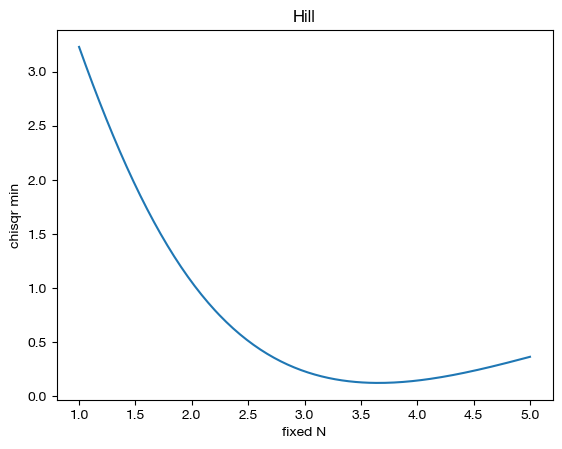

In [50]:
plt.figure()
plt.title('Hill')
plt.plot(n_values,chi_min)
data = np.array([n_values,chi_min]).transpose()
df = pd.DataFrame(data,columns=['n values','chimin'])
df.to_csv('intensity.csv')
# plt.axhline(y=0.90534755)
# plt.axhline(y=1.18)
# plt.ylim(0.9,1.9)
plt.xlabel('fixed N')
plt.ylabel('chisqr min')

In [51]:
d = {'n_values': n_values, 'chi_min': chi_min}
results = pd.DataFrame(data=d)
results

,n_values,chi_min
0,1.000000,3.228119
1,1.020101,3.169646
2,1.040201,3.111701
3,1.060302,3.054293
4,1.080402,2.997433
...,...,...
195,4.919598,0.342615
196,4.939698,0.348127
197,4.959799,0.353662
198,4.979899,0.359217


In [52]:
results.to_csv(path/('lifetime_'+date+'.csv'), encoding='utf-8', index=False)

### Choose file int ###

In [53]:
askchi2 = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
ResultFit = pd.read_csv(askchi2, encoding='utf-8')



In [54]:
ResultFit

,n_values,chi_min
0,1.000000,11.323700
1,1.010050,10.995532
2,1.020101,10.672289
3,1.030151,10.354111
4,1.040201,10.041126
...,...,...
195,2.959799,3.874830
196,2.969849,3.896531
197,2.979899,3.917924
198,2.989950,3.939011


In [55]:
resultdirectory = str(Path(askchi2).parent)+'//Plots_'+date
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/Chi-square/Plots_2024-07-05/Plots_2024-07-05')

In [57]:
x = ResultFit['n_values']
y = ResultFit['chi_min']

In [58]:
ymin = y.min()
loc_ymin = np.argmin(y)
xmin = x[loc_ymin]

In [59]:
nH = 1.7
SE = 0.1

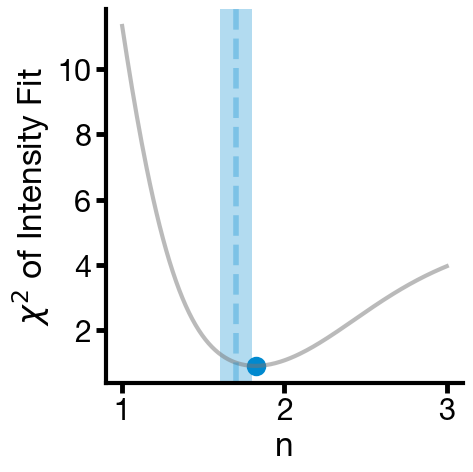

In [61]:
scattersize = 8
cap = 5
linetype = ['','--', ':','--', ':', '-.','']

fig, ax = plt.subplots(1,1,figsize=(5.25,5.25))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0


linx = np.arange(0, 230, 1)

ax.plot(x, y,color = grey, lw=3,ls= '-',alpha = 0.5,label='_nolegend_')
ax.scatter(xmin,ymin, color=cyan)
ax.axvline(x = nH, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3)
ax.axvspan(nH-SE,nH+SE, alpha=0.3, color=cyan,ec = None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
# ax.set_ylim(-0.015,0.7)
# ax.set_yticks(np.arange(0, 0.71, 0.2))
# #ax.set_xlim(-10,250)
# ax.set_xticks(np.arange(0, 251, 100))
ax.set_xlabel('n')


#ax.set_title('Rescue')
ax.set_ylabel(r'$\chi^2$'  ' of Intensity Fit')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')

#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('chi2_intensity'+date+'.pdf'))

### Choose file lifetime ###

In [57]:
askchi2 = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
ResultFit = pd.read_csv(askchi2, encoding='utf-8')



In [58]:
ResultFit

,Unnamed: 0,n values,chimin
0,0,1.000000,3.228119
1,1,1.020101,3.169646
2,2,1.040201,3.111701
3,3,1.060302,3.054293
4,4,1.080402,2.997433
...,...,...,...
195,195,4.919598,0.342615
196,196,4.939698,0.348127
197,197,4.959799,0.353662
198,198,4.979899,0.359217


In [59]:
resultdirectory = str(Path(askchi2).parent)+'//Plots_'+date
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/sofia/OneDrive/Casa/Data/Adam comments/Plots_2024-05-23')

In [60]:
x = ResultFit['n_values']
y = ResultFit['chi_min']

In [61]:
ymin = y.min()
loc_ymin = np.argmin(y)
xmin = x[loc_ymin]

In [62]:
nH = 3.4
SE = 0.3

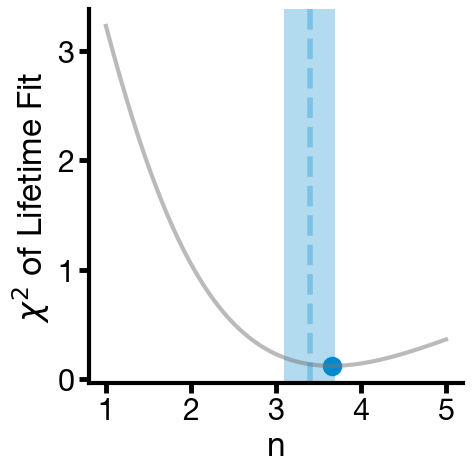

In [65]:
scattersize = 8
cap = 5
linetype = ['','--', ':','--', ':', '-.','']

fig, ax = plt.subplots(1,1,figsize=(5.25,5.25))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0


linx = np.arange(0, 230, 1)

ax.plot(x, y,color = grey, lw=3,ls= '-',alpha = 0.5,label='_nolegend_')
ax.scatter(xmin,ymin, color=cyan)
ax.axvline(x = nH, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3)
ax.axvspan(nH-SE,nH+SE, alpha=0.3, color=cyan,ec = None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
# ax.set_ylim(-0.015,0.7)
# ax.set_yticks(np.arange(0, 0.71, 0.2))
# #ax.set_xlim(-10,250)
ax.set_xticks(np.arange(1, 5.1, 1))
ax.set_xlabel('n')


#ax.set_title('Rescue')
ax.set_ylabel(r'$\chi^2$'  ' of Lifetime Fit')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')

#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('chi2_lifetime'+date+'.pdf'))

### Choose file resc ###

In [66]:
askchi2 = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
ResultFit = pd.read_csv(askchi2, encoding='utf-8')



In [67]:
ResultFit

,Unnamed: 0,n values,chimin
0,0,1.000000,558.946754
1,1,1.010050,557.694229
2,2,1.020101,556.454986
3,3,1.030151,555.229112
4,4,1.040201,554.016689
...,...,...,...
195,195,2.959799,553.709906
196,196,2.969849,554.477611
197,197,2.979899,555.247722
198,198,2.989950,556.020168


In [68]:
resultdirectory = str(Path(askchi2).parent)+'//Plots_'+date
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/sofia/OneDrive/Casa/Data/Adam comments/Plots_2024-05-23')

In [69]:
x = ResultFit['n_values']
y = ResultFit['chi_min']

In [70]:
ymin = y.min()
loc_ymin = np.argmin(y)
xmin = x[loc_ymin]

In [71]:
nH = 2.0
SE = 0.6

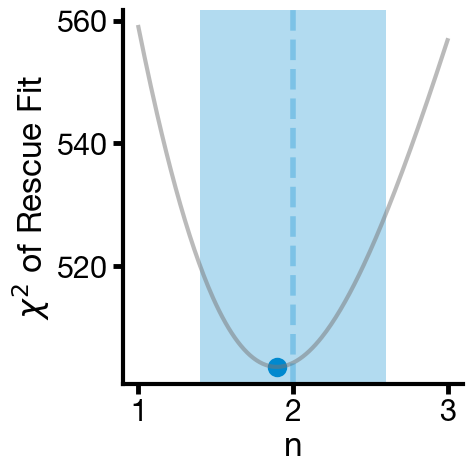

In [72]:
scattersize = 8
cap = 5
linetype = ['','--', ':','--', ':', '-.','']

fig, ax = plt.subplots(1,1,figsize=(5.25,5.25))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0


linx = np.arange(0, 230, 1)

ax.plot(x, y,color = grey, lw=3,ls= '-',alpha = 0.5,label='_nolegend_')
ax.scatter(xmin,ymin, color=cyan)
ax.axvline(x = nH, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3)
ax.axvspan(nH-SE,nH+SE, alpha=0.3, color=cyan,ec = None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
# ax.set_ylim(-0.015,0.7)
# ax.set_yticks(np.arange(0, 0.71, 0.2))
# #ax.set_xlim(-10,250)
# ax.set_xticks(np.arange(0, 251, 100))
ax.set_xlabel('n')


#ax.set_title('Rescue')
ax.set_ylabel(r'$\chi^2$'  ' of Rescue Fit')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')

#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('chi2_rescue'+date+'.pdf'))